# My Identity

**Nama:** NAFIATUL FADLILAH <br>


# Data Understanding

• **Age** : Age of the insured <br>
• **Sex** : Gender <br>
• **Bmi** : body mass index <br>
• **Children** : Number of children <br>
• **Smoker** : Indicator if you smoke <br>
• **Region** : Region where the insured lives <br>
• **Charges** : Secure prime

# Preprocessing

## Import Library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

## Loading Data

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# inisialisasi path direktori
path = "/content/drive/MyDrive/DL_Data/insurance.csv"

In [4]:
df = pd.read_csv(path)
df.shape

(1338, 7)

In [5]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


### Exploration Data Analysis (EDA)

#### Data Information

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [7]:
df['sex'].unique()

array(['female', 'male'], dtype=object)

In [8]:
df['smoker'].unique()

array(['yes', 'no'], dtype=object)

In [9]:
df['region'].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

#### Checking Possible Missing Value

In [10]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

#### Univariate Analysis

In [11]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [12]:
df['charges'].mode()

0    1639.5631
Name: charges, dtype: float64

In [13]:
df.charges.sort_values(ascending=False)[:10]

543     63770.42801
1300    62592.87309
1230    60021.39897
577     58571.07448
819     55135.40209
1146    52590.82939
34      51194.55914
1241    49577.66240
1062    48970.24760
488     48885.13561
Name: charges, dtype: float64

<Axes: xlabel='children'>

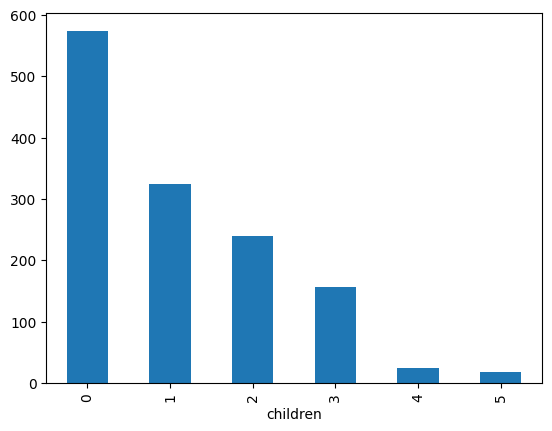

In [14]:
df['children'].value_counts().plot(kind='bar')

Berdasarkan visualisasi tersebut, orang yang diasuransikan didominasi oleh orang yang tidak memiliki anak.

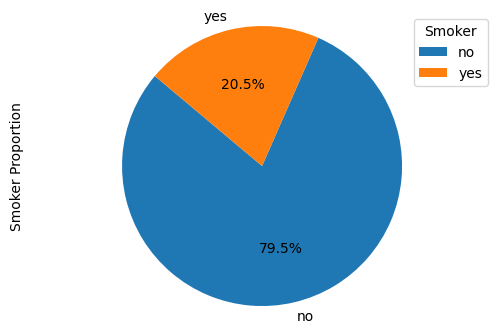

In [ ]:
# Menghitung jumlah untuk setiap kategori
smoker_counts = df['smoker'].value_counts()

# Membuat grafik pie
plt.figure(figsize=(6, 4))
plt.pie(smoker_counts, labels=smoker_counts.index, autopct='%1.1f%%', startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Menambahkan legenda
plt.legend(title='Smoker')

# Menambahkan judul untuk sumbu y
plt.ylabel('Smoker Proportion')

# Menampilkan grafik
plt.show()

Berdasarkan pie chart tersebut, orang yang diasuransikan didominasi oleh orang yang tidak merokok yakni sekitar 79.5%.

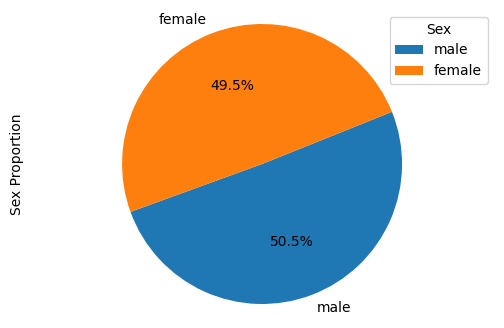

In [ ]:
# Menghitung jumlah untuk setiap kategori
smoker_counts = df['sex'].value_counts()

# Membuat grafik pie
plt.figure(figsize=(6, 4))
plt.pie(smoker_counts, labels=smoker_counts.index, autopct='%1.1f%%', startangle=200)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Menambahkan legenda
plt.legend(title='Sex')

# Menambahkan judul untuk sumbu y
plt.ylabel('Sex Proportion')

# Menampilkan grafik
plt.show()

Berdasarkan pie chart tersebut perbandingan proporsi orang yang diasuransikan antara male dan female tidak terlalu jauh.

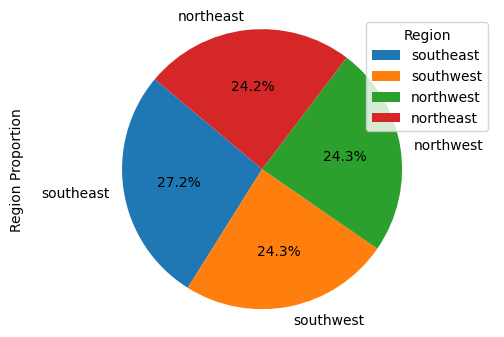

In [ ]:
# Menghitung jumlah untuk setiap kategori
smoker_counts = df['region'].value_counts()

# Membuat grafik pie
plt.figure(figsize=(6, 4))
plt.pie(smoker_counts, labels=smoker_counts.index, autopct='%1.1f%%', startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Menambahkan legenda
plt.legend(title='Region')

# Menambahkan judul untuk sumbu y
plt.ylabel('Region Proportion')

# Menampilkan grafik
plt.show()

Pie chart tersebut menunjukkan bahwa persebaran orang yang diasuransikan di masing-masing region cukup merata.

#### Bivariate Analysis

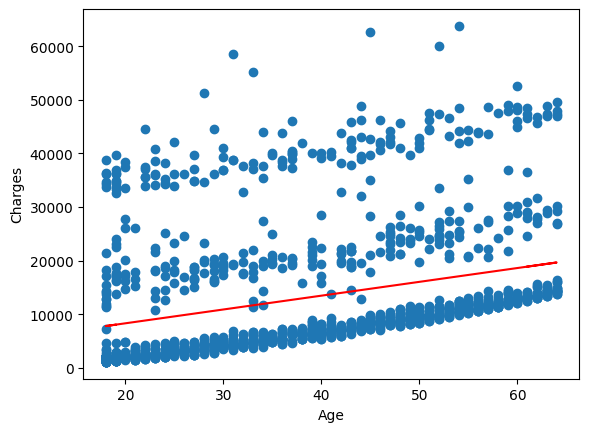

In [ ]:
plt.scatter(df['age'],df['charges'])

m, b = np.polyfit(df['age'], df['charges'], 1)
plt.plot(df['age'], m*df['age'] + b, color='red')

plt.xlabel('Age')
plt.ylabel('Charges')
plt.show()

Dari scatter plot di atas, hubungan antara variabel age dan charges cukup signifikan. Ditunjukkan dari semakin tua usia orang yang diasuransikan maka charges atau tagihan dari premi asuransinya juga cukup tinggi. **Karena korelasinya yang cukup signifikan tersebut, pada kasus ini variabel age dapat dijadikan kandidat prediktor dalam pemodelan prediksi charges asuransi**.

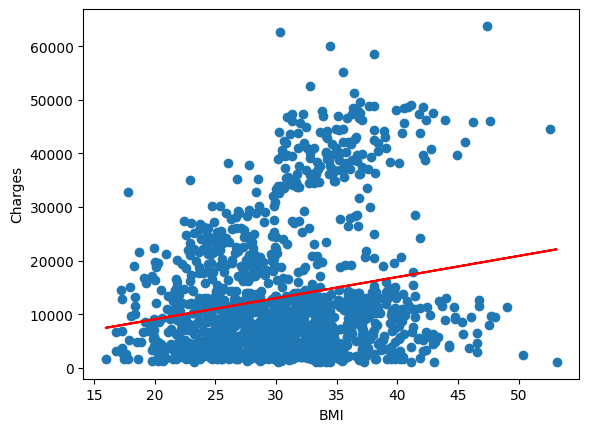

In [ ]:
plt.scatter(df['bmi'],df['charges'])

m, b = np.polyfit(df['bmi'], df['charges'], 1)
plt.plot(df['bmi'], m*df['bmi'] + b, color='red')

plt.xlabel('BMI')
plt.ylabel('Charges')
plt.show()

Dari scatter plot di atas, hubungan antara variabel BMI dan charges menunjukkan signifikansi yang baik. Hal ini karena semakin tinggi BMI dari orang yang diasuransikan maka charges atau tagihan dari premi asuransinya juga menjadi cukup tinggi. **Oleh karena itu, pada kasus ini variabel BMI dapat dijadikan kandidat prediktor dalam pemodelan prediksi charges asuransi**.

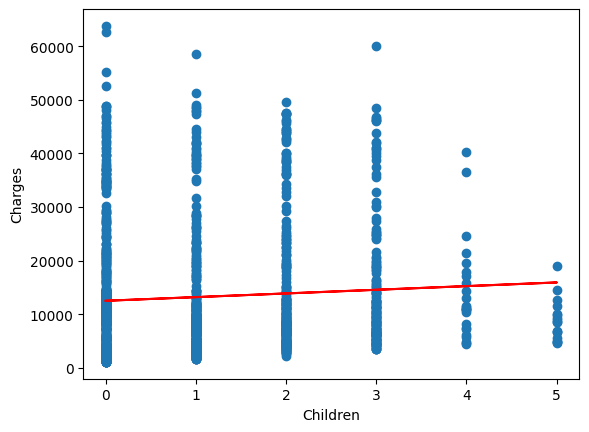

In [ ]:
plt.scatter(df['children'],df['charges'])

m, b = np.polyfit(df['children'], df['charges'], 1)
plt.plot(df['children'], m*df['children'] + b, color='red')

plt.xlabel('Children')
plt.ylabel('Charges')
plt.show()

Dari scatter plot tersebut, korelasi antara variabel children dan charges menunjukkan hampir tidak adanya korelasi linear. Hal ini karena garis yang terbentuk dari grafik tersebut tampak hampir mendatar yang diasumsikan bahwa variabel children (jumlah anak) tidak cukup mempengaruhi charges atau tagihan premi asuransi. **Sehingga pada pemodelan prediksi, variabel children lebih baik tidak digunakan sebagai prediktor**.

<Axes: >

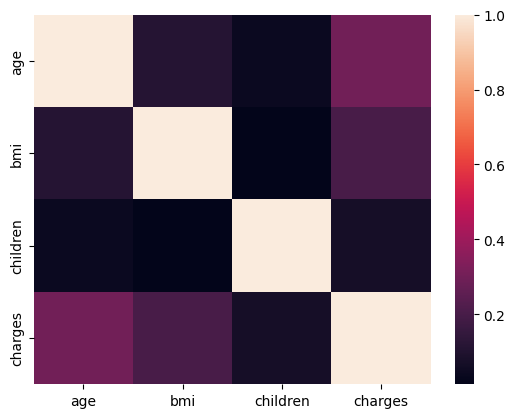

In [ ]:
sns.heatmap(df[['age', 'bmi', 'children', 'charges']].corr()) # korelasi antar variabel

Visualisasi heatmap tersebut menunjukkan bahwa variabel children yang diwakili warna gelap memiliki koefisien korelasi yang mendekati 0 sehingga tidak berkolerasi dengan charges. Sedangkan variabel yang diwakili warna cerah menggambarkan cukup berkorelasi dengan variabel charges.

#### Multivariate Analysis

In [15]:
px.scatter(df,y='charges',x='bmi',color='smoker')

Dari visulisasi di atas tampak bahwa perokok cenderung memiliki charges atau tagihan premi asuransi yang tinggi.

In [16]:
px.scatter(df,y='charges',x='bmi',color='sex')

Visualisasi tersebut menunjukkan bahwa gender orang yang diasuransikan tidak terlalu berpengaruh pada charges atau tagihan premi asuransi. Hal ini karena persebaran node male dan female cukup merata.

In [17]:
px.scatter(df,y='charges',x='age',color='smoker')

Visualisasi tersebut menunjukkan bahwa perokok cenderung memiliki charges atau tagihan premi asuransi yang tinggi.

In [ ]:
px.scatter(df,y='charges',x='age',color='sex')

Visualisasi tersebut menunjukkan bahwa gender orang yang diasuransikan tidak terlalu berpengaruh pada charges atau tagihan premi asuransi. Hal ini karena persebaran node male dan female cukup merata.

In [ ]:
px.scatter(df,y='charges',x='bmi',color='children')

Meskipun visualisasi di atas cukup merata node-node nya, namun orang yang tidak memiliki anak tagihan premi asuransinya cenderung tidak tinggi.

In [18]:
px.scatter(df,y='charges',x='age',color='children')

In [ ]:
temp = df[['smoker','children']] # bikin dataset tempt punya 2 kolom
t = temp.groupby(by=['smoker','children']).size() # kayak sql buat nampilin data jenis bahan bakar dan gaya body kendaraan beserta jumlahnya
t

smoker  children
no      0           459
        1           263
        2           185
        3           118
        4            22
        5            17
yes     0           115
        1            61
        2            55
        3            39
        4             3
        5             1
dtype: int64

In [ ]:
t = t.reset_index() # mengatur ulang index
t.columns = ['smoker','children','units'] # bikin dataset baru yang punya 3 kolom
t

,smoker,children,units
0,no,0,459
1,no,1,263
2,no,2,185
3,no,3,118
4,no,4,22
5,no,5,17
6,yes,0,115
7,yes,1,61
8,yes,2,55
9,yes,3,39


In [ ]:
px.bar(t, x='children', y='units', color='smoker', barmode='group')

Bar chart tersebut menunjukkan bahwa orang yang tidak merokok mendominasi baik dia mempunyai anak maupun tidak.

In [ ]:
temp = df[['smoker','sex']] # bikin dataset tempt punya 2 kolom
t = temp.groupby(by=['smoker','sex']).size() # kayak sql buat nampilin data jenis bahan bakar dan gaya body kendaraan beserta jumlahnya
t

smoker  sex   
no      female    547
        male      517
yes     female    115
        male      159
dtype: int64

In [ ]:
t = t.reset_index() # mengatur ulang index
t.columns = ['smoker','sex','units'] # bikin dataset baru yang punya 3 kolom
t

,smoker,sex,units
0,no,female,547
1,no,male,517
2,yes,female,115
3,yes,male,159


In [ ]:
px.bar(t, x='sex', y='units', color='smoker', barmode='group')

Bar chart tersebut menunjukkan bahwa orang yang tidak merokok sangat mendominasi baik gendernya female maupun male. Dan perbandingan orang yang merokok antara male dan female juga tidak ekstrem.

#### Categorical Data Encoding

Using mapper() function

In [ ]:
# untuk mengubah data kategorikal jadi numerik --> mirip sama teknik label encoder cuma ini manual pake fungsi mapper() punya python
def mapper(param):
    uniqueVals = set(df[param]);
    mappedVals = {};
    i = 0

    for mem in uniqueVals:
        mappedVals[mem] = i
        i = i + 1

    print (mappedVals)
    df[param] =  df[param].map(mappedVals)

    return uniqueVals, mappedVals

In [ ]:
mapper('sex')

{'female': 0, 'male': 1}


({'female', 'male'}, {'female': 0, 'male': 1})

In [ ]:
mapper('smoker')

{'no': 0, 'yes': 1}


({'no', 'yes'}, {'no': 0, 'yes': 1})

In [ ]:
mapper('region')

{'southwest': 0, 'northwest': 1, 'southeast': 2, 'northeast': 3}


({'northeast', 'northwest', 'southeast', 'southwest'},
 {'southwest': 0, 'northwest': 1, 'southeast': 2, 'northeast': 3})

In [ ]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,0,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   int64  
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   int64  
 5   region    1338 non-null   int64  
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(5)
memory usage: 73.3 KB


In [ ]:
df.describe()

,age,sex,bmi,children,smoker,region,charges
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,0.505232,30.663397,1.094918,0.204783,1.513453,13270.422265
std,14.049960,0.500160,6.098187,1.205493,0.403694,1.104915,12110.011237
min,18.000000,0.000000,15.960000,0.000000,0.000000,0.000000,1121.873900
25%,27.000000,0.000000,26.296250,0.000000,0.000000,1.000000,4740.287150
50%,39.000000,1.000000,30.400000,1.000000,0.000000,2.000000,9382.033000
75%,51.000000,1.000000,34.693750,2.000000,0.000000,2.000000,16639.912515
max,64.000000,1.000000,53.130000,5.000000,1.000000,3.000000,63770.428010


<Axes: >

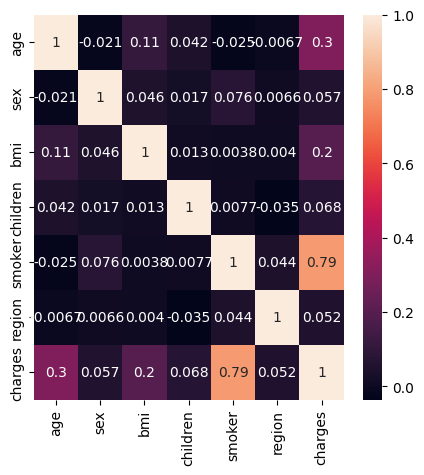

In [ ]:
fig = plt.subplots(figsize=(5,5))
sns.heatmap(df.corr(), annot=True)

Visualisasi di atas menunjukkan hubungan atau korelasi antar variabel yang ada di dataset pada kasus ini. Dari visualisasi heatmap tersebut didominasi variabel dengan warna yang gelap. Hal ini menunjukkan hanya ada beberapa variabel yang sesuai untuk dijadikan prediktor dalam prediksi charges premi asuransi yakni variabel yang diwakili warna cerah dalam hubungannya dengan variabel charges.

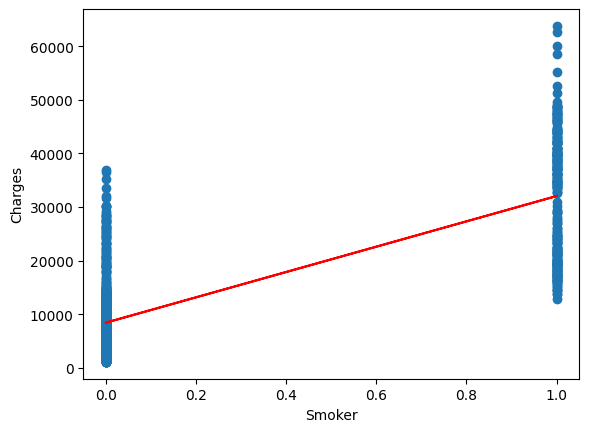

In [ ]:
plt.scatter(df['smoker'],df['charges'])

m, b = np.polyfit(df['smoker'], df['charges'], 1)
plt.plot(df['smoker'], m*df['smoker'] + b, color='red')

plt.xlabel('Smoker')
plt.ylabel('Charges')
plt.show()

Dari fungsi mapper() sebelumnya value NO diwakili dengan angka 0 dan value YES diwakili dengan angka 1. Berdasarkan visualisasi scatter tersebut orang yang merokok cenderung memiliki tagihan premi asuransi yang tinggi dibandingkan orang yang tidak merokok. Hal ini ditunjukkan oleh garis linear yang terbentuk cenderung menanjak ke nilai yang tinggi atau berarti bahwa variabel smoker sangat berpengaruh signifikan terhadap variabel charges. **Sehingga pada kasus ini, variabel smoker dapat dijadikan kandidat prediktor dalam prediksi tagihan premi asuransi**.

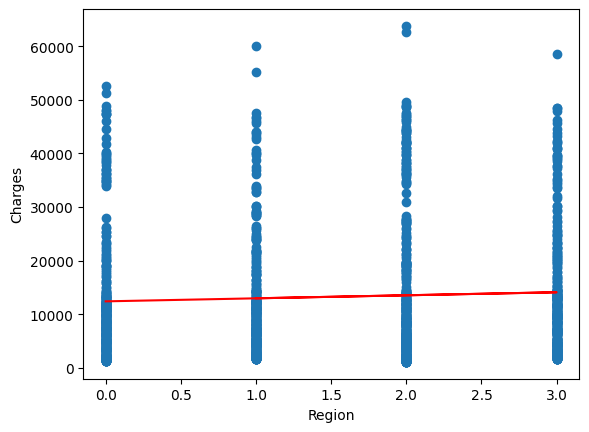

In [ ]:
plt.scatter(df['region'],df['charges'])

m, b = np.polyfit(df['region'], df['charges'], 1)
plt.plot(df['region'], m*df['region'] + b, color='red')

plt.xlabel('Region')
plt.ylabel('Charges')
plt.show()

Dari scatter plot tersebut, korelasi antara variabel region dan charges menunjukkan hampir tidak adanya korelasi linear. Hal ini karena garis yang terbentuk dari grafik tersebut tampak hampir mendatar yang diasumsikan bahwa variabel region tidak cukup berpengaruh pada variabel charges atau tagihan premi asuransi. **Sehingga pada pemodelan prediksi, variabel region lebih baik tidak digunakan sebagai prediktor**.

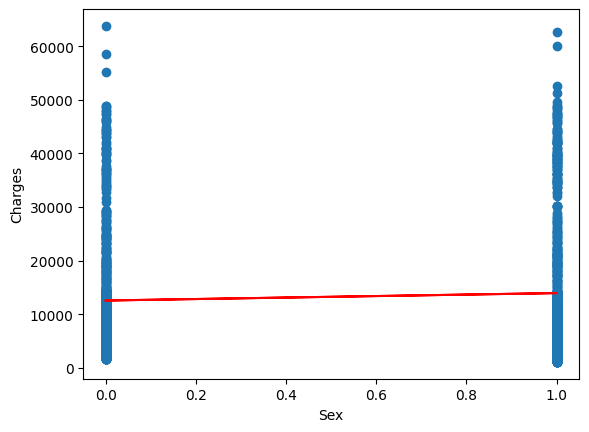

In [ ]:
plt.scatter(df['sex'],df['charges'])

m, b = np.polyfit(df['sex'], df['charges'], 1)
plt.plot(df['sex'], m*df['sex'] + b, color='red')

plt.xlabel('Sex')
plt.ylabel('Charges')
plt.show()

Dari scatter plot tersebut, korelasi antara variabel sex dan charges menunjukkan hampir tidak adanya korelasi linear. Hal ini karena garis yang terbentuk dari grafik tersebut tampak hampir mendatar yang diasumsikan bahwa variabel sex tidak cukup berpengaruh pada variabel charges atau tagihan premi asuransi. **Sehingga pada pemodelan prediksi, variabel sex lebih baik tidak digunakan sebagai prediktor**.

#### Dropping Irrelevant Columns

Berdasarkan analisis sebelumnya, diputuskan bahwa variabel sex, children, dan region tidak akan digunakan sebagai prediktor dalam prediksi tagihan premi asuransi karena tidak cukup berpengaruh pada variabel target yakni charges.

In [ ]:
df = df.drop(['sex', 'children', 'region'], axis=1)
df.head(5)

,age,bmi,smoker,charges
0,19,27.900,1,16884.92400
1,18,33.770,0,1725.55230
2,28,33.000,0,4449.46200
3,33,22.705,0,21984.47061
4,32,28.880,0,3866.85520


# Modelling

### Import Library

In [ ]:
import sklearn
from sklearn.preprocessing import StandardScaler # untuk menstandarisasi fitur
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

import keras # untuk melatih model ann
from keras.models import Sequential # untuk membuat simple layer dalam arsitektur deep learning (membuatnya layer demi layer scr berurutan)
from keras import models, layers, optimizers

## Data Splitting and Scaling

In [ ]:
Y = df.pop('charges')

In [ ]:
StdSc = StandardScaler()
X = StdSc.fit_transform(df) # menstandarisasi setiap fitur dengan mengurangkan rata-rata dan membaginya dengan stdev
Y = Y / 1000 # menyesuaikan skala var target Y agar sesuai dengan skala fitur

In [ ]:
X

array([[-1.43876426, -0.45332   ,  1.97058663],
       [-1.50996545,  0.5096211 , -0.5074631 ],
       [-0.79795355,  0.38330685, -0.5074631 ],
       ...,
       [-1.50996545,  1.0148781 , -0.5074631 ],
       [-1.29636188, -0.79781341, -0.5074631 ],
       [ 1.55168573, -0.26138796,  1.97058663]])

In [ ]:
Y

0       16.884924
1        1.725552
2        4.449462
3       21.984471
4        3.866855
          ...    
1333    10.600548
1334     2.205981
1335     1.629833
1336     2.007945
1337    29.141360
Name: charges, Length: 1338, dtype: float64

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,Y, random_state=42, test_size = 0.33) # membagi proporsi data

## Machine Learning

### Linear Regression

r2: 0.755540757797331
MAE: 4.24959458278752
RMSE: 5.985331697828509
MSE: 35.824195533030704


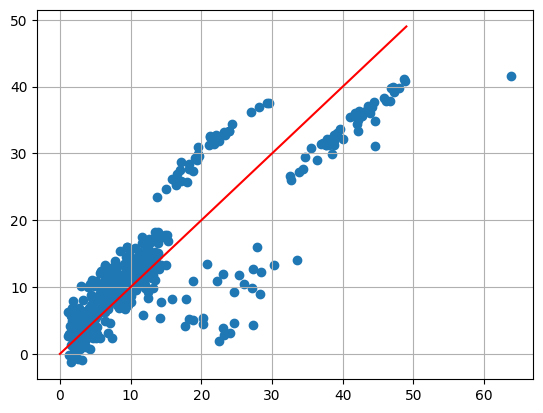

In [ ]:
from sklearn.linear_model import LinearRegression
modelLR = LinearRegression()
modelLR.fit(X_train, y_train)
y_predict = modelLR.predict(X_test)
y_pred = y_predict.flatten()

print('r2:', r2_score(y_test,y_predict))
print('MAE:', mean_absolute_error(y_test,y_predict))
print('RMSE:', (mean_squared_error(y_test,y_predict, squared= False)))
print('MSE:', (mean_squared_error(y_test,y_predict)))

plt.scatter(y_test, y_pred)
plt.plot(np.arange(0,50), np.arange(0, 50), color = 'red')
plt.grid(True)

Berdasarkan training yang telah dilakukan tersebut **model dapat dikatakan cukup baik** dalam melakukan prediksi charges atau tagihan premi asuransi. Hal ini karena:


*   **Nilai R-Squared yang hampir mendekati angka 1 yaitu 0.755** mengindikasikan bahwa model memiliki kemampuan prediksi yang cukup baik.
*   **Nilai MAE yang cukup rendah yakni 4.25** menunjukkan model tersebut cukup akurat dalam memprediksi nilai tagihan.
*   **Nilai RMSE yang cukup rendah yakni 5.98** menunjukkan variasi nilai yang dihasilkan model cukup mendekati variasi nilai observasi sebenarnya.
*   **Nilai MSE yang cukup rendah yakni 35.8** menunjukkan model memiliki performa yang cukup baik dalam memprediksi nilai tagihan.
*   Visualisasi scatter tersebut juga menunjukkan bahwa **pencilan data cukup minim** sehingga kesalahan prediksi tidak cukup banyak terjadi. Pada metode LR ini, **penyebaran titik-titik yang seragam di sekitar garis identitas (garis dimana nilai y_test sama dengan y_predict) hanya di rentang 0-20 saja** atau prediksi benar di bagian ini. Sedangkan di rentang 20 ke atas nilai y_predict yang dihasilkan tidak cukup tepat dari nilai y_test nya karena titik-titiknya terkonsentrasi di area tertentu.

Kesimpulannya: <br>
**Model yang dihasilkan dari algoritma Linear Regression pada kasus ini sudah cukup baik digunakan untuk memprediksi charges atau tagihan premi asuransi**.


In [ ]:
Xnew = np.array([[-1.3, 0.4, 0.57]])

ynew = modelLR.predict(Xnew) # memprediksi nilai baru pake model yang uda dibuat atau dilatih sebelumnya (objek network)
print("X= %s \n Predicted= %s" % (Xnew[0], ynew[0]))

X= [-1.3   0.4   0.57] 
 Predicted= 14.729799587411518


### Decision Tree Regression

r2: 0.692898682507722
MAE: 3.3499961532217193
RMSE: 6.708506309301848
MSE: 45.004056901942704


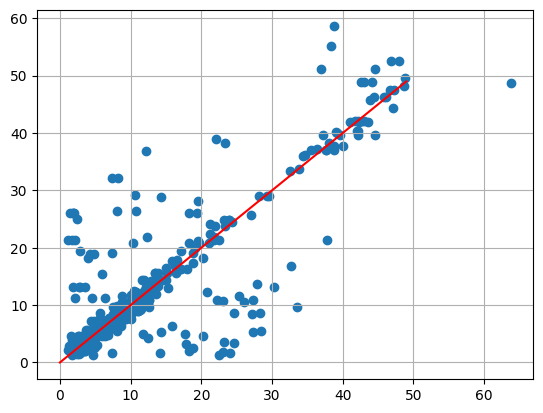

In [ ]:
from sklearn.tree import DecisionTreeRegressor
modelDT = DecisionTreeRegressor()
modelDT.fit(X_train, y_train)
y_predict = modelDT.predict(X_test)
y_pred = y_predict.flatten()

print('r2:', r2_score(y_test,y_predict))
print('MAE:', mean_absolute_error(y_test,y_predict))
print('RMSE:', (mean_squared_error(y_test,y_predict, squared= False)))
print('MSE:', (mean_squared_error(y_test,y_predict)))

plt.scatter(y_test, y_pred)
plt.plot(np.arange(0,50), np.arange(0, 50), color = 'red')
plt.grid(True)

Berdasarkan training yang telah dilakukan tersebut **model dapat dikatakan belum cukup baik** dalam melakukan prediksi charges atau tagihan premi asuransi. Hal ini karena:

*   **Nilai R-Squared = 0.69 belum mendekati 0.8** untuk dapat dikatakan baik atau cukup baik dalam memprediksi.
*   **Nilai MAE yang cukup rendah atau lebih baik jika dibandingkan dengan nilai MAE dari model LR yakni 3.34**, menunjukkan model tersebut seharusnya sudah cukup akurat dalam memprediksi nilai tagihan.
*   **Nilai RMSE = 6.70 masih belum cukup baik dibandingkan dengan nilai RMSE model LR**.
*   **Nilai MSE yang agak tinggi yakni 45.00 dibandingkan model LR**, menunjukkan model tersebut memiliki performa yang belum cukup baik dalam memprediksi nilai tagihan.
*   Visualisasi scatter tersebut juga menunjukkan bahwa **pencilan data agak banyak** sehingga kesalahan prediksi cukup banyak terjadi. Pada metode DT ini, **penyebaran titik-titik yang seragam di sekitar garis identitas (garis dimana nilai y_test sama dengan y_predict) cukup menyebar** tetapi masih sedikit jika dibandingkan dengan LR meskipun LR hanya benar di rentang 0-20 saja.

Kesimpulan: <br>
**Model yang dihasilkan dari algoritma Decision Tree Regression pada kasus ini belum cukup baik digunakan untuk memprediksi charges atau tagihan premi asuransi**.

In [ ]:
Xnew = np.array([[-1.3, 0.4, 0.57]])

ynew = modelDT.predict(Xnew) # memprediksi nilai baru pake model yang uda dibuat atau dilatih sebelumnya (objek network)
print("X= %s \n Predicted= %s" % (Xnew[0], ynew[0]))

X= [-1.3   0.4   0.57] 
 Predicted= 26.018950519999997


### Support Vector Regression

r2: 0.8115593043429361
MAE: 2.355788552976152
RMSE: 5.254995423863865
MSE: 27.614976904830165


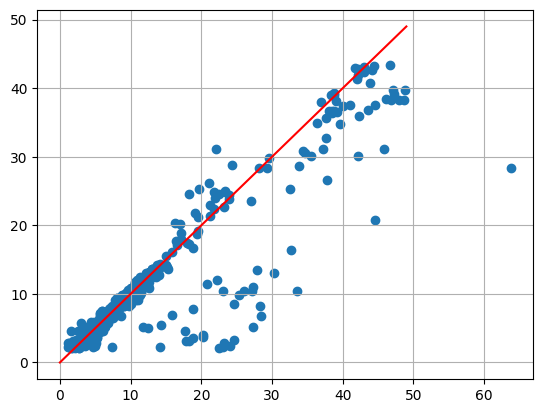

In [ ]:
from sklearn.svm import SVR
modelSVR = SVR()
modelSVR.fit(X_train, y_train)
y_predict = modelSVR.predict(X_test)
y_pred = y_predict.flatten()

print('r2:', r2_score(y_test,y_predict))
print('MAE:', mean_absolute_error(y_test,y_predict))
print('RMSE:', (mean_squared_error(y_test,y_predict, squared = False)))
print('MSE:', (mean_squared_error(y_test,y_predict)))

plt.scatter(y_test, y_pred)
plt.plot(np.arange(0,50), np.arange(0, 50), color = 'red')
plt.grid(True)

Berdasarkan training yang telah dilakukan tersebut **model dapat dikatakan cukup baik** dalam melakukan prediksi charges atau tagihan premi asuransi. Hal ini karena:

*   **Nilai R-Squared yang mendekati angka 1 yaitu 0.811** mengindikasikan bahwa model memiliki kemampuan prediksi yang baik.
*   **Nilai MAE sangat rendah yakni 2.35** dibandingkan dengan model LR dan DT menunjukkan model tersebut akurat dalam memprediksi nilai tagihan.
*   **Nilai RMSE yang rendah yakni 5.2** dibandingkan model LR dan DT menunjukkan variasi nilai yang dihasilkan model cukup mendekati variasi nilai observasi sebenarnya.
*   **Nilai MSE yang rendah yakni 27.61** atau lebih kecil dibandingkan model LR dan DT, menunjukkan model memiliki performa yang baik dalam memprediksi nilai tagihan.
*   Visualisasi scatter tersebut juga menunjukkan bahwa **pencilan data cukup minim** sehingga kesalahan prediksi tidak cukup banyak terjadi. Pada metode SVR ini, **penyebaran titik-titik yang seragam di sekitar garis identitas (garis dimana nilai y_test sama dengan y_predict) cukup menyebar** atau prediksi benar tidak hanya terkonsentrasi di area tertentu saja.

Kesimpulannya: <br>
**Model yang dihasilkan dari algoritma SVR pada kasus ini sudah baik digunakan untuk memprediksi charges atau tagihan premi asuransi**. Dibandingkan LR dan DT, algoritma SVR paling sesuai diterapkan pada kasus ini sehingga model yang dihasilkan juga yang paling baik di antara 2 algoritma sebelumnya.

In [ ]:
Xnew = np.array([[-1.3, 0.4, 0.57]])

ynew = modelSVR.predict(Xnew) # memprediksi nilai baru pake model yang uda dibuat atau dilatih sebelumnya (objek network)
print("X= %s \n Predicted= %s" % (Xnew[0], ynew[0]))

X= [-1.3   0.4   0.57] 
 Predicted= 14.34555772051303


## Deep Learning

### ANN (Artificial Neural Network) Regression

In [ ]:
# membuat model neural network baru yang bersifat sequential, artinya layer-layer dalam model ini akan ditumpuk secara berurutan
network = models.Sequential()

# nambahin layer pertama dengan 24 neuron atau unit
network.add(layers.Dense(6, activation='relu', input_shape=(3,)))

# nambahin layer kedua dengan 32 neuron
network.add(layers.Dense(12, activation='relu'))

# nambahin layer terakhir dengan 1 neuron (karena regresi nilai akhirnya cuma 1 value)
network.add(layers.Dense(1))

In [ ]:
# evaluate model
network.compile(loss='mse', optimizer='adam', metrics=['mae'])

In [ ]:
history = network.fit(X_train, y_train, epochs=150, batch_size=50,  verbose=1, validation_split=0.2)

Epoch 1/150
15/15 [==============================] - 1s 19ms/step - loss: 333.0063 - mae: 13.6998 - val_loss: 303.8482 - val_mae: 12.5114
Epoch 2/150
15/15 [==============================] - 0s 5ms/step - loss: 329.2534 - mae: 13.5753 - val_loss: 300.6309 - val_mae: 12.3906
Epoch 3/150
15/15 [==============================] - 0s 5ms/step - loss: 325.7128 - mae: 13.4565 - val_loss: 297.4128 - val_mae: 12.2702
Epoch 4/150
15/15 [==============================] - 0s 5ms/step - loss: 322.0157 - mae: 13.3370 - val_loss: 294.0995 - val_mae: 12.1461
Epoch 5/150
15/15 [==============================] - 0s 5ms/step - loss: 318.2836 - mae: 13.2099 - val_loss: 290.3424 - val_mae: 12.0095
Epoch 6/150
15/15 [==============================] - 0s 5ms/step - loss: 314.0391 - mae: 13.0690 - val_loss: 286.2031 - val_mae: 11.8595
Epoch 7/150
15/15 [==============================] - 0s 4ms/step - loss: 309.2520 - mae: 12.9108 - val_loss: 281.4579 - val_mae: 11.6870
Epoch 8/150
15/15 [=====================

dict_keys(['loss', 'mae', 'val_loss', 'val_mae'])


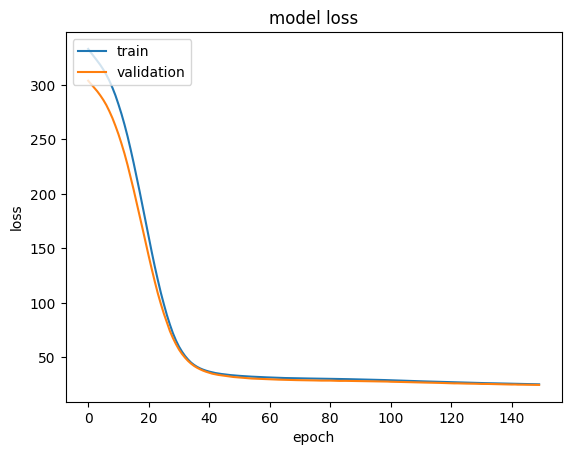

In [ ]:
print(history.history.keys())
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [ ]:
Xnew = np.array([[-1.3, 0.4, 0.57]])

ynew = network.predict(Xnew) # memprediksi nilai baru pake model yang uda dibuat atau dilatih sebelumnya (objek network)
print("X= %s \n Predicted= %s" % (Xnew[0], ynew[0]))

1/1 [==============================] - 1s 524ms/step
X= [-1.3   0.4   0.57] 
 Predicted= [11.466756]


Berdasarkan proses training tersebut, tampak bahwa performa model baik. Hal ini karena:
*   **Nilai loss dan MAE menurun cukup rendah seiring waktu selama proses epoch** menandakan bahwa model sedang belajar dengan baik.
*   **Nilai val_loss dan val_mae lebih rendah dibandingkan nilai loss dan mae** yang mengindikasikan tidak terjadi overfitting pada model yang dihasilkan.

Kesimpulannya:
**Model yang dihasilkan dari ANN ini masih cukup baik digunakan untuk memprediksi nilai charges atau tagihan premi asuransi pada kasus ini**. Akan tetapi, jika dibandingkan dengan LR, hasil model ANN ini mungkin masih di bawahnya karena hasil prediksi target dari contoh prediksi menggunakan input yang sama yang sudah didefinisikan di atas juga berbeda dengan hasil prediksi SVR dan LR yang sama-sama di nilai 14 sedangkan ANN menghasilkan 11. Meskipun begitu perbedaan ini tidak cukup jauh karena ANN masih lebih baik dibandingkan DT yang hasil prediksinya cukup jauh di nilai 26.  